# Animal Track Classification With CNN
### ITCS 4156, Spring 2020
#### Sara Ashcraft, James Black, Debabrata Das, Bonaventure Raj

### Objective
We will train a CNN to classify animal tracks based on the taxonomic rank of order. If successful, our results would be useful for wildlife conservation. We will be referencing work done by individuals from the Dogs vs. Cats Kaggle challenge linked below:

https://www.kaggle.com/c/dogs-vs-cats

This will allow us to jumpstart our project by building off of others' work on a similar problem. Let's start by preparing our data.

### Data
Our dataset will be composed of images of animal tracks. We collected this data by web scraping the following site:

http://www.naturetracking.com/mammal-tracks/#/

After collecting the data, we grouped the images by the order of the species that the track images belonged to. We chose to classify by order, as opposed to more specific classifications like family, genus, or species, because of the amount of data available. Grouping by a more specific classification would mean that some classes would not have enough data.

In [1]:
import cv2 as cv
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from copy import deepcopy as copy
import tensorflow as tf
from tensorflow import keras
import os

# Load data
path = os.listdir("./images")
labels = []
images = []
plotting_images = []
for folder in path:
    order_path = os.listdir("./images/" + folder)
    for subfolder in order_path:
        image_path = os.listdir("./images/" + folder + "/" + subfolder)
        for image in image_path:
            labels.append(folder)
            plotting_images.append('./images/' + folder + "/"+ subfolder + "/" + image)
            images.append(image)
            
df = pd.DataFrame({'image':images, 'order':labels, 'path':plotting_images})
df

,image,order,path
0,0.thumbnail,Artiodactyla,./images/Artiodactyla/Bighorn/0.thumbnail
1,1.thumbnail,Artiodactyla,./images/Artiodactyla/Bighorn/1.thumbnail
2,2.thumbnail,Artiodactyla,./images/Artiodactyla/Bighorn/2.thumbnail
3,3.thumbnail,Artiodactyla,./images/Artiodactyla/Bighorn/3.thumbnail
4,4.thumbnail,Artiodactyla,./images/Artiodactyla/Bighorn/4.thumbnail
...,...,...,...
636,2.thumbnail,Rodentia,./images/Rodentia/Woodrat/2.thumbnail
637,3.thumbnail,Rodentia,./images/Rodentia/Woodrat/3.thumbnail
638,4.thumbnail,Rodentia,./images/Rodentia/Woodrat/4.thumbnail
639,5.thumbnail,Rodentia,./images/Rodentia/Woodrat/5.thumbnail


In [2]:
print(len(df['image']))

641


Let us take a look at a random sample of our data in order to determine what preprocessing should be done. First, we will want to separate our images and their labels. Then, we will plot.

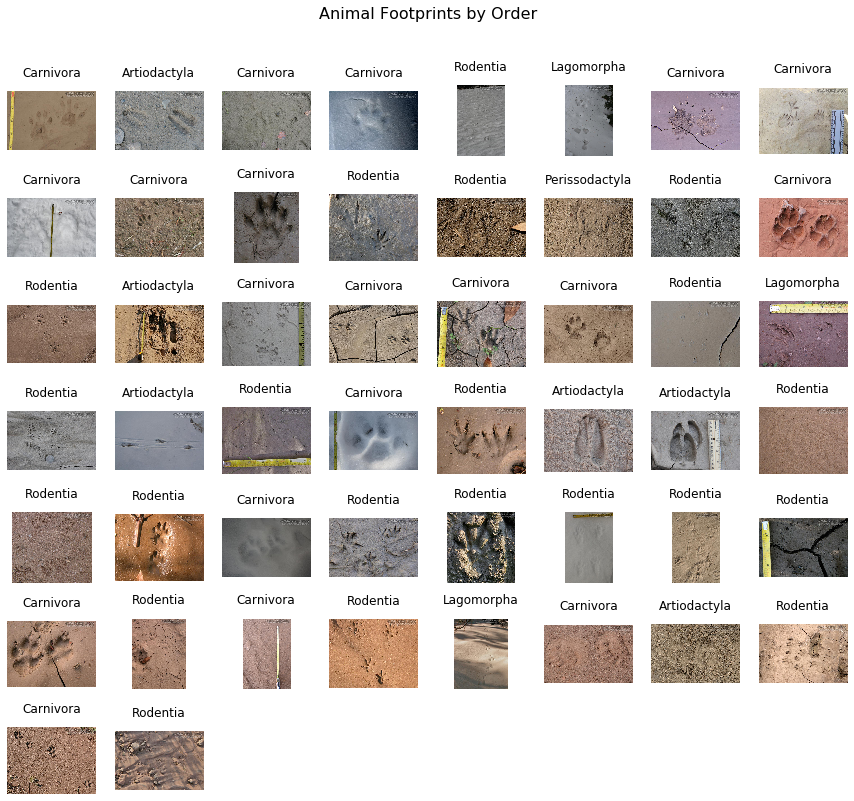

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import IPython.display as ipd

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlepad'] = 15

# Separate images and labels
X = df[['image']].values.copy()
y = df[['order']].values.copy()
plt_y = df[['path']].values.copy()

# Random indexes
N = df.shape[0]
randIdxs = np.random.randint(N, size=50)

# Visualize
plt.figure(figsize=(12,12))
plt.suptitle("Animal Footprints by Order" , size=16, y=1.05)
nr = int(np.ceil(np.sqrt(randIdxs.size)))

for i in range(randIdxs.size):
    plt.subplot(nr, nr, 1 + i)
    path = plt_y[randIdxs[i]][0]
    img = mpimg.imread(path)
    plt.imshow(img, cmap="binary")
    plt.title(y[randIdxs[i]][0])
    plt.axis("off")
plt.tight_layout()

### Preprocesing

While we were scraping the images in, we processed all the images to have the same dimensions so that it would be easier to pass into the convultional net. We can see below that the dimensions are (636,424,3) where 636,424, and 3 represents the height width and number of channels, respectively.

In [4]:
preprocess = []

for i in range(len(df['path'])):
    img = mpimg.imread(df['path'][0])
    preprocess.append(img.shape)
print(preprocess[0])
assert(len(preprocess) == len(df['path']))
# checking if all values == (636,424,3)
print("All values are of size", str(preprocess[0]) + "?:", all(i==(636,424,3) for i in preprocess))

(636, 424, 3)
All values are of size (636, 424, 3)?: True


Below we standardize the data, as we saw above the color disperancies of the background are very evident. However, it isn't the background that we are concerned with but the footprints. If we standardize the data so that all the values are not far from 

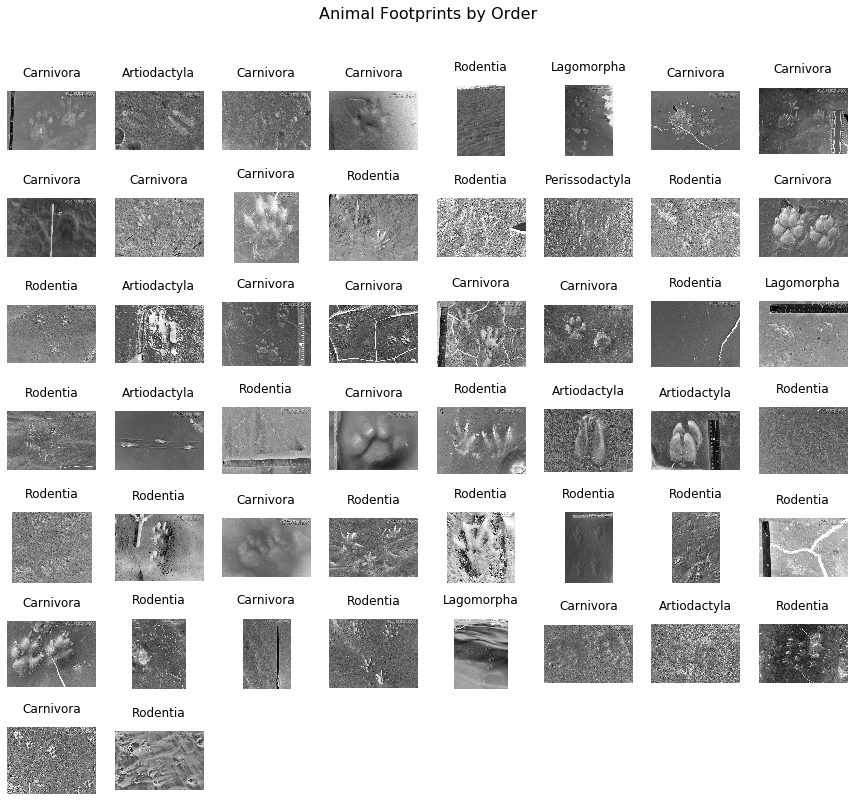

In [16]:
# Standardize
norm_images = []

for i in range(N):
    path = plt_y[i][0]
    img = mpimg.imread(path)
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    img = np.asarray(img).astype('float32')
    norm_img = (img-img.mean())/img.std()
    norm_images.append(norm_img)

# Visualize
plt.figure(figsize=(12,12))
plt.suptitle("Animal Footprints by Order" , size=16, y=1.05)
nr = int(np.ceil(np.sqrt(randIdxs.size)))

for i in range(randIdxs.size):
    plt.subplot(nr, nr, 1 + i)
    plt.imshow(norm_images[randIdxs[i]], cmap="binary")
    plt.title(y[randIdxs[i]][0])
    plt.axis("off")
plt.tight_layout()

### References
https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification